In [1]:
import os, sys
project_root_dir = os.path.join(os.getcwd(),'..')
if project_root_dir not in sys.path:
    sys.path.append(project_root_dir)

import torch, config
import IPDL
from autoencoder import SDAE, SDAE_TYPE, AE_CONV_UPSAMPLING
import numpy as np

# FMNIST

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Resize, Compose, Normalize

transforms = Compose([
    Resize((64,64)),
    ToTensor(),
    Normalize([0.5], [0.5])
])

# train_set = datasets.FashionMNIST("dataset", train=True, download=True, transform=transforms)
test_set = datasets.FashionMNIST("dataset", train=False, download=True, transform=transforms)

from torch.utils.data import DataLoader
# train_loader = DataLoader(train_set, batch_size=512, shuffle=True)
test_loader = DataLoader(test_set, batch_size=128, shuffle=False)

In [3]:
from functools import reduce
from IPDL.optim.func import silverman_optimize
from IPDL.functional import matrix_estimator
def get_Ax(x, gamma=.5):
    n = x.size(0)
    d = x.size(1) if len(x.shape)==2 else reduce(lambda x,y:x*y, x.shape[1:])

    sigma = silverman_optimize(x, gamma=gamma, normalize=True)
    print(sigma)
    _, Ax = matrix_estimator(x, sigma)
    return Ax

In [4]:
val_inputs = next(iter(test_loader))[0]
gamma = 4e-1
Ax = get_Ax(val_inputs, gamma=gamma)

25.569722315573685


In [5]:
from IPDL.InformationTheory import MatrixBasedRenyisEntropy as MRE

ref_entropy = MRE.entropy(Ax)

print("Input Entropy: {}".format(ref_entropy))

Input Entropy: 5.212604999542236


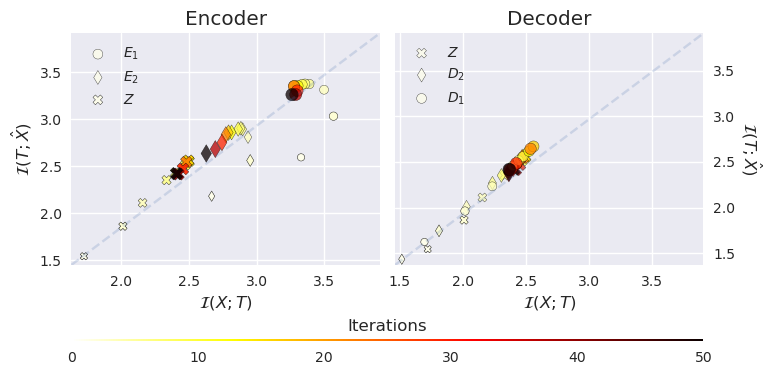

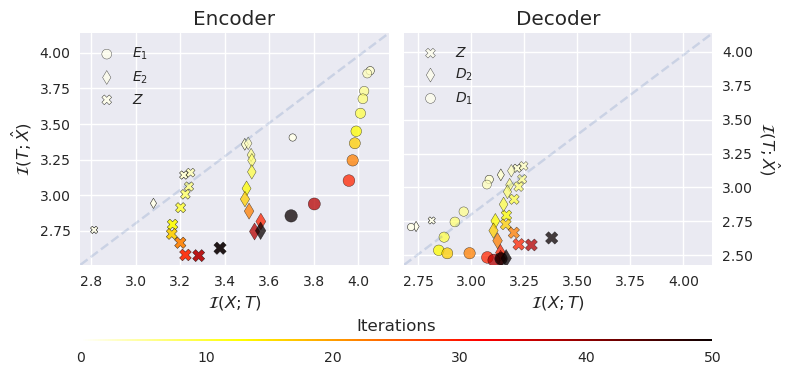

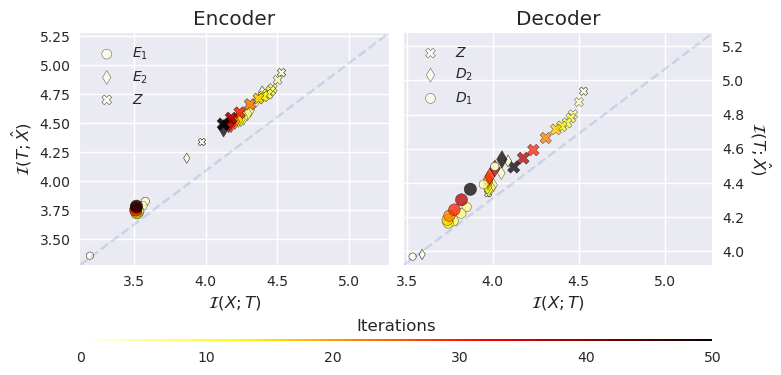

Layer 1             Layer 2             Layer 3             Layer 4  \
        Ixt       Ity       Ixt       Ity       Ixt       Ity       Ixt   
0  0.454546  0.000037  0.074315  0.000037  0.021142  0.000036  0.001581   
1  3.681682  4.033376  4.603824  5.185851  4.664149  5.276219  4.295663   
2  3.614693  3.891441  4.426606  4.854877  4.588936  5.046778  4.163221   
3  3.591623  3.875256  4.415974  4.839380  4.545248  4.997124  4.118686   
4  3.557666  3.801786  4.419785  4.785672  4.525441  4.917240  4.076574   

              Layer 5            
        Ity       Ixt       Ity  
0  0.000036  0.000085  0.000035  
1  4.924701  4.314327  5.034130  
2  4.633424  4.182354  4.724457  
3  4.578877  4.099836  4.611133  
4  4.493120  4.008773  4.465932

In [22]:
import pandas as pd
from IPDL.utils import show_aeip
from matplotlib import pyplot as plt
data = ["ae_dropout_p5_FMNIST", "ae_dropout_p2_FMNIST", "ae_no_dropout_FMNIST"]
for ae_data in data:
    df = pd.read_pickle(os.path.join(os.path.join("../Result/IP/", ae_data+".pkl")))
    ref_entropy = df.max().max()
    fig = show_aeip(df, ref_entropy, n=15, moving_average_n=8)
    fig.savefig(os.path.join("../Result/IP/imgs/", ae_data+".pdf"), bbox_inches='tight')
    plt.show()

df.head()

In [18]:
df.max().mean()

4.601392126083374

# Diabetic Foot Ulcer

In [23]:
from DFU import DiabeticFootDataset
# Diabetic Foot Dataset
    # Training dataset
DATASET_DIR = "/home/abian/Data/Dataset/DiabeticFootDataset/"
iactec_dataset_dir = os.path.join(DATASET_DIR, 'IACTEC/Processed/Cropped')
inaoe_dataset_dir = os.path.join(DATASET_DIR, 'INAOE/Processed/Cropped')
_dataset = DiabeticFootDataset([iactec_dataset_dir, inaoe_dataset_dir])

    # Testing dataset
test_dataset_dir = os.path.join(DATASET_DIR, 'Test/Processed/Cropped')
_test_set = DiabeticFootDataset(test_dataset_dir)

from DFU import DiabeticFootTorchDataset
from torchvision.transforms import ToTensor, Resize, Compose, Normalize
from torch.utils.data import DataLoader

# transforms = Compose([Resize((64, 64)), ToTensor()])
transform = Compose([Resize((64, 64)), ToTensor(), Normalize([0.5], [0.5])])

#train
train_set = DiabeticFootTorchDataset(_dataset, transform=transform)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)

#test
test_set = DiabeticFootTorchDataset(_test_set, transform=transform)
val_loader = DataLoader(test_set, batch_size=32, shuffle=False)

In [24]:
val_inputs = next(iter(val_loader))[0]
gamma = 4e-1
Ax = get_Ax(val_inputs, gamma=gamma)

25.578369426608894


In [25]:
from IPDL.InformationTheory import MatrixBasedRenyisEntropy as MRE
ref_entropy = MRE.entropy(Ax)
print("Input Entropy: {}".format(MRE.entropy(Ax)))

Input Entropy: 2.8131275177001953


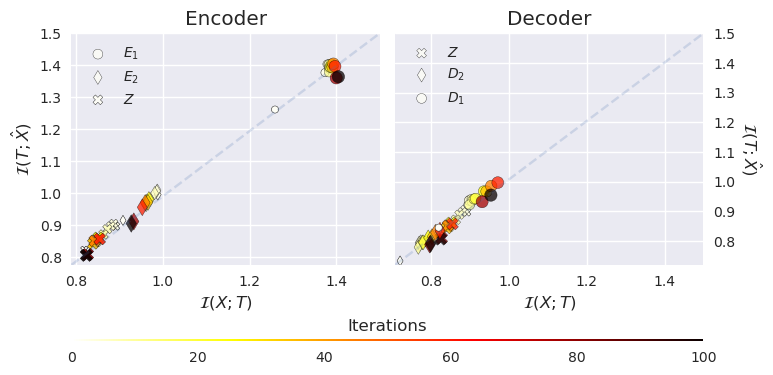

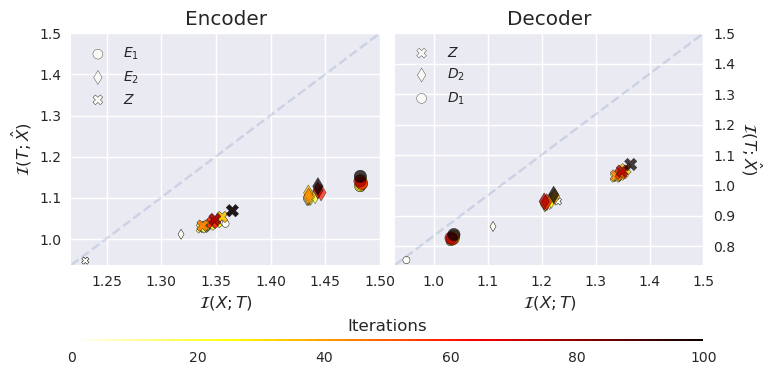

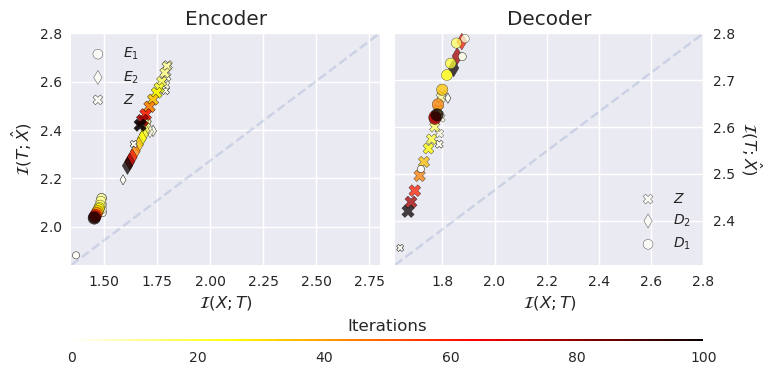

In [31]:
import pandas as pd
from IPDL.utils import show_aeip
from matplotlib import pyplot as plt
data = ["ae_dropout_p5_DFU", "ae_dropout_p2_DFU", "ae_no_dropout_DFU"]
ref_entropy = [1.5, 1.5, 2.8]
for idx, ae_data in enumerate(data):
    df = pd.read_pickle(os.path.join(os.path.join("../Result/IP/", ae_data+".pkl")))
    fig = show_aeip(df, ref_entropy[idx], n=18, moving_average_n=12)
    fig.savefig(os.path.join("../Result/IP/imgs/", ae_data+".pdf"), bbox_inches='tight')
    plt.show()


In [31]:
import pandas as pd 
# df = pd.read_pickle(os.path.join("../Result/IP/ae_dropout_p5_DFU.pkl"))
# df = pd.read_pickle(os.path.join("../Result/IP/ae_dropout_p2_DFU.pkl"))
df = pd.read_pickle(os.path.join("../Result/IP/ae_no_dropout_DFU.pkl"))
df.head()

Layer 1             Layer 2             Layer 3             Layer 4  \
        Ixt       Ity       Ixt       Ity       Ixt       Ity       Ixt   
0  1.489897  1.939427  1.878658  2.469572  1.779189  2.377173  1.964071   
1  1.489101  1.880686  1.777407  2.249677  1.728204  2.239755  1.862062   
2  1.488785  1.882609  1.735563  2.195215  1.732973  2.250365  1.846879   
3  1.489614  1.968498  1.719062  2.275142  1.761310  2.399852  1.905794   
4  1.491819  2.069351  1.713196  2.384406  1.791769  2.576952  1.987426   

              Layer 5            
        Ity       Ixt       Ity  
0  2.671941  1.771341  2.406387  
1  2.452347  1.693211  2.228756  
2  2.434103  1.694636  2.230596  
3  2.640708  1.781778  2.464553  
4  2.917706  1.894923  2.778223

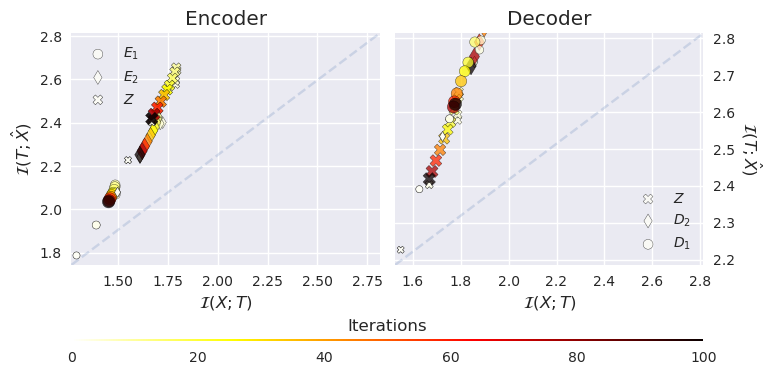

In [32]:
from IPDL.utils import show_aeip
from matplotlib import pyplot as plt
fig = show_aeip(df, ref_entropy, n=18, moving_average_n=15)
plt.show()